# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یافتن Convex Hull یا پوش محدب</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
در ریاضیات، پوشش محدب(Convex hull) یا لفاف محدب مجموعه از نقاط در صفحه اقلیدسی یا فضای اقلیدسی، کوچکترین مجموعه محدبی است که شامل این مجموعه می‌باشد. به عنوان مثال، هنگامی که X یک زیر مجموعه محدود از نقاط در صفحه است، پوشش محدب ممکن است به شکل نواری نشان داده شود که در اطراف X کشیده شده است.</div>

[https://fa.wikipedia.org/wiki/پوش_محدب](https://fa.wikipedia.org/wiki/%D9%BE%D9%88%D8%B4_%D9%85%D8%AD%D8%AF%D8%A8)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ابتدا با یک مثال ساده تعدادی نقطه تصادفی ایجاد کرده و پوشش محدب آن ها را رسم می‌کنیم:
</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ایجاد نقاط تصادفی روی تصویر مشکی</div>

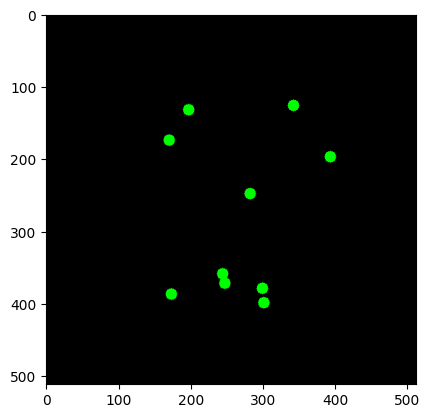

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed=50
random_points = np.random.randint(100, 400, 20)
random_points = random_points.reshape(10, 2)
# Create a black image
image = np.zeros((512,512,3), np.uint8)
for point in random_points:
    cv2.circle(image, (point[0],point[1]),8,(0,255,0),-1)
plt.imshow(image[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">محاسبه و رسم پوشش محدب</div>

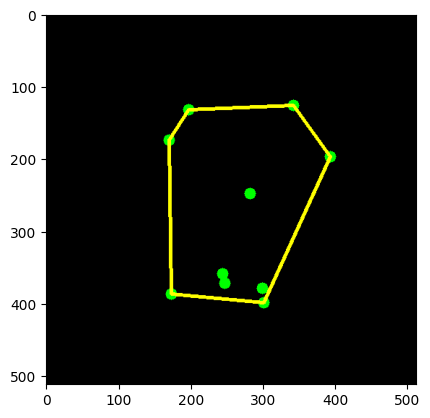

In [9]:
hull = cv2.convexHull(random_points)
cv2.drawContours(image, [hull], -1, (0,255,255), 4)
plt.imshow(image[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مثال محاسبه پوشش محدب بعد از محاسبه کانتور</div>

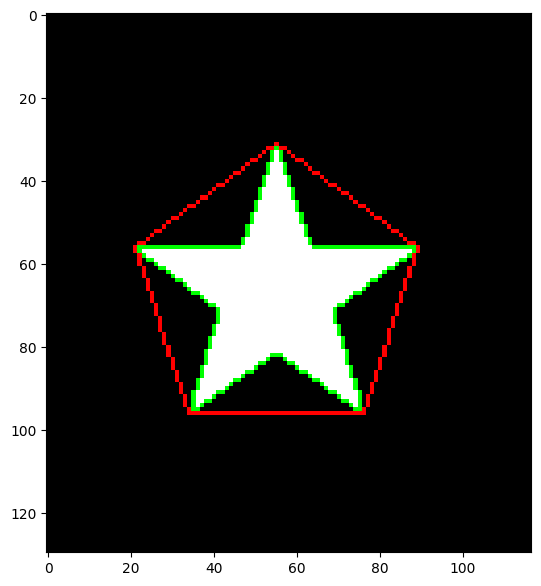

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load source image
bgr_image = cv2.imread("D:/star.png")

# Convert image to gray and blur it
src_gray = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(src_gray, 127, 255, 0)


# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the convex hull object for each contour
hull_list = []
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)
    
# Draw contours + hull results
cv2.drawContours(bgr_image, contours, -1, (0,255,0), 1)
cv2.drawContours(bgr_image, hull_list, -1, (0,0,255),1)

plt.figure(figsize=[7,7])
plt.imshow(bgr_image[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مثال دیگر روی اشکال بیشتر</div>

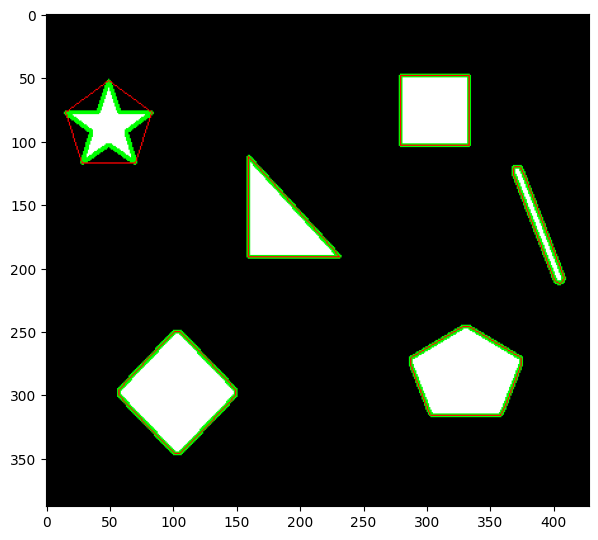

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load source image
bgr_image = cv2.imread("D:/shapes.png")

# Convert image to gray and blur it
src_gray = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(src_gray, 127, 255, 0)


# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the convex hull object for each contour
hull_list = []
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)
    
# Draw contours + hull results
cv2.drawContours(bgr_image, contours, -1, (0,255,0), 2)
cv2.drawContours(bgr_image, hull_list, -1, (0,0,255),1)

plt.figure(figsize=[7,7])
plt.imshow(bgr_image[...,::-1])

https://docs.opencv.org/3.4/d7/d1d/tutorial_hull.html